In [1]:
"""
This example extracts piano sounds from single-channel mixed of music.

This is done by first learning P(f|z) from piano samples,
which is later used to partially fix P(f|z) in training on mixed music. 
Then reconstruct spectrogram from P(f|z), P(t|z) and P(z) where P(z') = 0 for all z' other than piano features.

Author: Keren Zhu 2017
Credit: Spectrogram construct By Frank Zalkow. Refer http://www.frank-zalkow.de/en/code-snippets/create-audio-spectrograms-with-python.html?i=1
"""

import scipy.io.wavfile as wav
from spectrogram import stft
from train import train, train_given_Pf
from reconstruct import reconstruct, relative_restore

# load wave
rate, piano_wave = wav.read(open("./dataset/1/piano_sample2.wav", "rb"))
rate, mixed_wave = wav.read(open('./dataset/1/mixed2.wav', 'rb'))
# construct spectrogram
piano_spec = stft(piano_wave)
mixed_spec = stft(mixed_wave)
# train piano features
piano_Pf, _, _ = train(piano_spec, zn=15, maxstep=100)
# train mixed music with parially fixed P(f|z) from piano features.
Pf, Pt, Pz = train_given_Pf(mixed_spec, piano_Pf, zn=30, maxstep=100)

# extract only piano
Pz_piano = Pz.copy()
piano_zn = len(piano_Pf)
all_zn = len(Pz)
Pz_piano[range(piano_zn, all_zn)] = 0

restored_piano_spec = reconstruct(Pf, Pt, Pz_piano)
restored_piano_wave = relative_restore(mixed_spec, restored_piano_spec)
wav.write("extracted_piano.wav", rate, restored_piano_wave.astype(int))

Step 0: Entropy = 9.744134e+00, D(Entropy) = 2.301611e+00.

Step 50: Entropy = 9.550008e+00, D(Entropy) = 2.172712e-04.

Step 100: Entropy = 9.544184e+00, D(Entropy) = 5.211117e-05.

Step 0: Entropy = 1.122374e+01, D(Entropy) = 5.252290e-01.

Step 50: Entropy = 1.104339e+01, D(Entropy) = 1.083817e-04.

Step 100: Entropy = 1.104116e+01, D(Entropy) = 2.111924e-05.



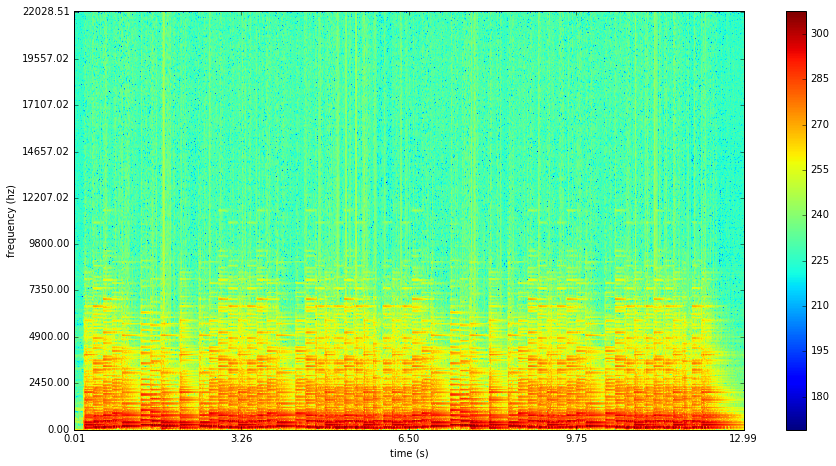

In [2]:
%matplotlib inline
from spectrogram import plotstft
plotstft('extracted_piano.wav')

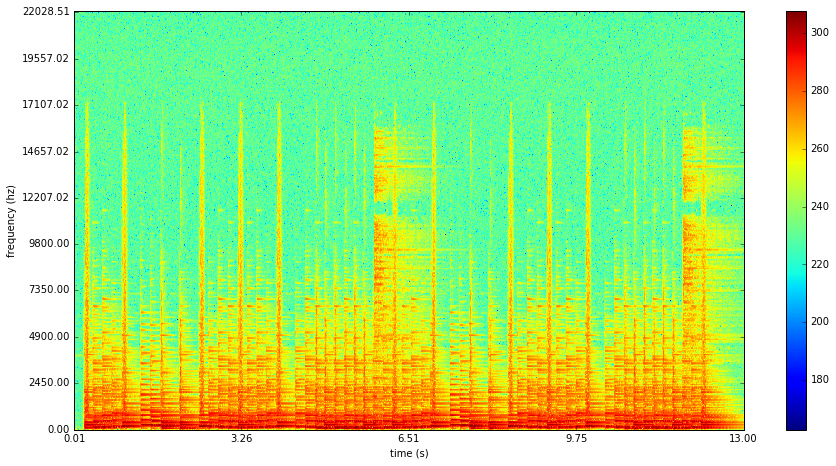

In [3]:
plotstft('./dataset/1/mixed2.wav')